## Question 4.1

Establish mathematical models of two analog signals $s_{a1}(t)$ and $s_{a2}(t)$, where $s_{a1}(t)$ is the useful signal and $s_{a2}(t)$ is the interference signal. The center frequency, signal bandwidth and other parameters of the two signals are selected by the students themselves. It is required that the spectrum of the two signals does not overlap. The amplitude of $s_{a2}(t)$ is 20dB higher than the amplitude of $s_{a1}(t)$. The time domain superposition of the two signals is synthesized. Signal $x_{a}(t)$, that is

$$x_{a}(t)= s_{a1}(t)+ s_{a2}(t)$$

Design a computer program to simulate the generation of $s_{a1}(t)$, $s_{a2}(t)$, and $x_{a}(t)$ signals, and draw the time domain waveforms and spectrum diagrams of the three simulated signals respectively.

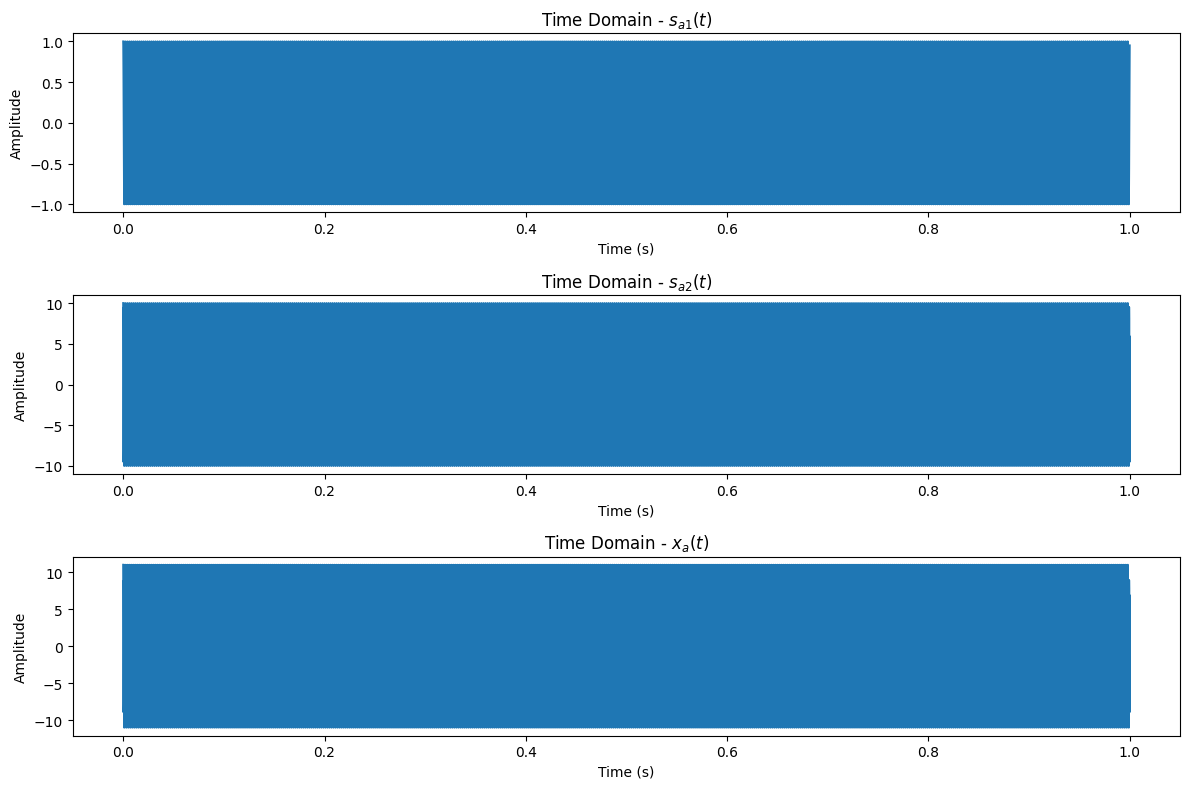

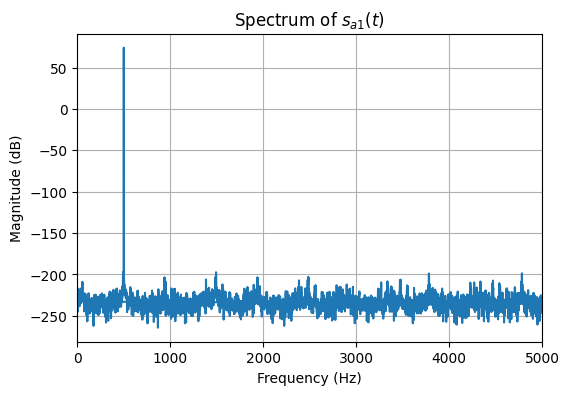

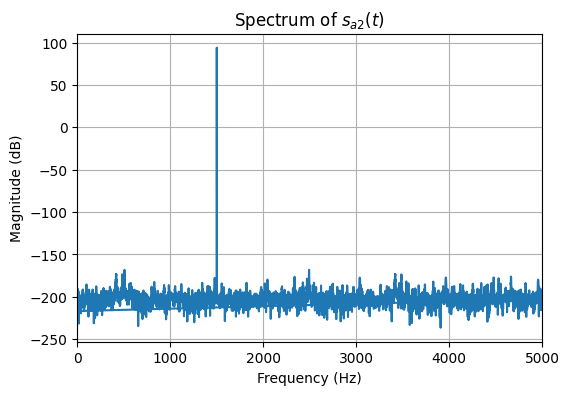

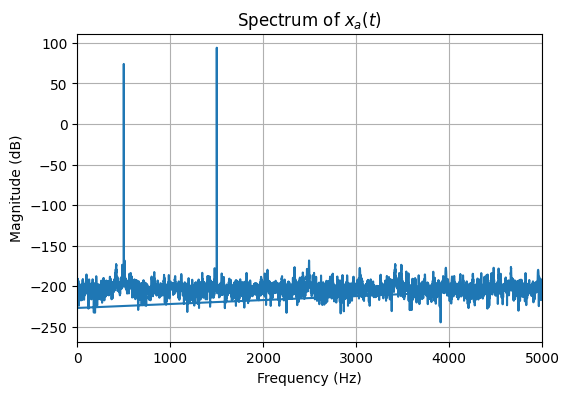

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and signal parameters
fs = 10000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second
f1 = 500  # Center frequency of sa1(t) (Hz)
f2 = 1500  # Center frequency of sa2(t) (Hz), ensuring no spectral overlap
A1 = 1  # Amplitude of sa1(t)
A2 = 10 * A1  # Amplitude of sa2(t) is 20 dB higher

# Generate signals
sa1 = A1 * np.cos(2 * np.pi * f1 * t)
sa2 = A2 * np.cos(2 * np.pi * f2 * t)
xa = sa1 + sa2  # Superposition of sa1 and sa2

# Function to calculate and plot spectrum
def plot_spectrum(signal, title):
    f = np.fft.fftfreq(len(signal), 1/fs)
    Y = np.fft.fft(signal)
    plt.figure(figsize=(6, 4))
    plt.plot(f, 20 * np.log10(np.abs(Y)))
    plt.title('Spectrum of ' + title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.xlim(0, fs/2)
    plt.grid(True)
    plt.show()

# Time-domain plots
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, sa1)
plt.title('Time Domain - $s_{a1}(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, sa2)
plt.title('Time Domain - $s_{a2}(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, xa)
plt.title('Time Domain - $x_{a}(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Spectrum plots
plot_spectrum(sa1, '$s_{a1}(t)$')
plot_spectrum(sa2, '$s_{a2}(t)$')
plot_spectrum(xa, '$x_{a}(t)$')

To complete the task of simulating and analyzing two analog signals $s_{a1}(t)$ and $s_{a2}(t)$ along with their superposition $x_a(t)$, we will follow these steps:

1. **Define Signal Parameters**: We'll choose suitable center frequencies and bandwidths to ensure that the spectra of $s_{a1}(t)$ and $s_{a2}(t)$ do not overlap. $s_{a2}(t)$ will have an amplitude 20dB higher than $s_{a1}(t)$.
2. **Generate the Signals**: We'll create the signals using sine waves for simplicity, modifying amplitude and frequency according to the requirements.
3. **Compute Spectra**: The Fourier Transform will be used to find the spectrum of each signal.
4. **Plotting**: Display the time-domain and frequency-domain plots of each signal.

Explanation:

1. **Signal Generation**: We've chosen two cosine waves for $s_{a1}(t)$ and $s_{a2}(t)$ with different frequencies (500 Hz and 1500 Hz) to ensure that their spectra do not overlap. The amplitude of $s_{a2}(t)$ is set to be 20 dB higher than $s_{a1}(t)$, which corresponds to a ratio of 10:1.
2. **Fourier Transform**: This is used to compute the spectrum of each signal. The `np.fft.fft` function calculates the discrete Fourier Transform, and the frequency vector is generated by `np.fft.fftfreq`.
3. **Plotting**: Time-domain plots are shown first for each signal individually and then for their superposition. Frequency-domain plots show the magnitude in dB to visualize the difference in amplitude clearly.

## Question 4.2

According to the center frequency and bandwidth of $x_{a}(t)$, select the sampling frequency fs according to the Nyquist sampling theorem, and sample the signals $s_{a1}(t)$, $s_{a2}(t)$, and $x_{a}(t)$ in the time domain respectively to obtain discrete Signals $s_{1}(n)$, $s_{2}(n)$, $x(n)$. Use the FFT algorithm to analyze the spectrum of discrete signals and draw the time domain waveforms and spectrum diagrams of three discrete signals.

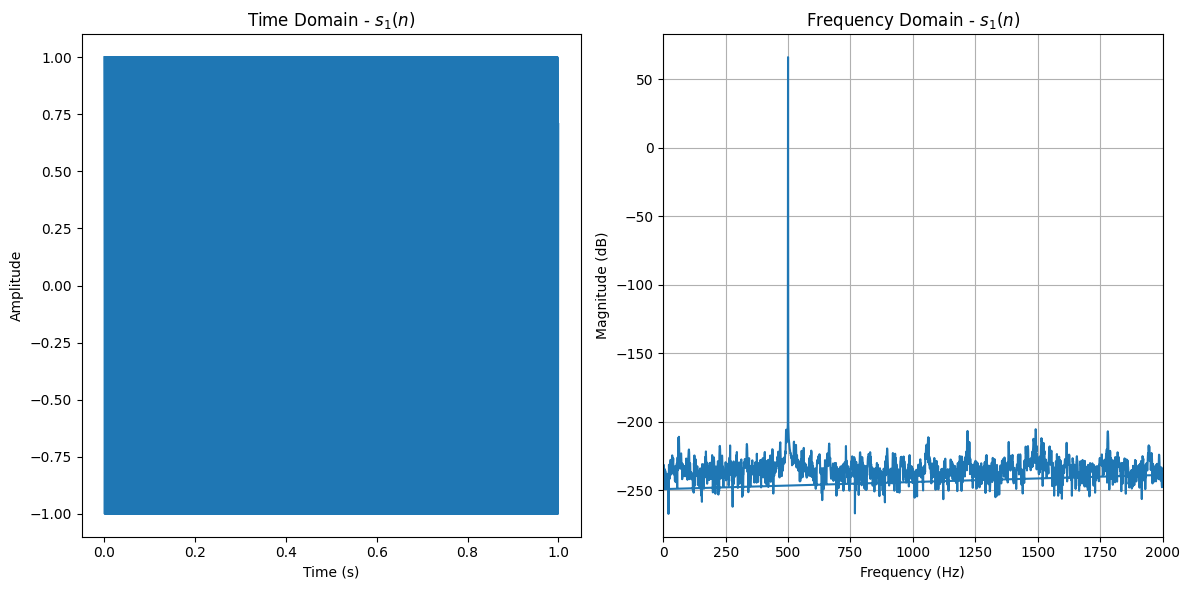

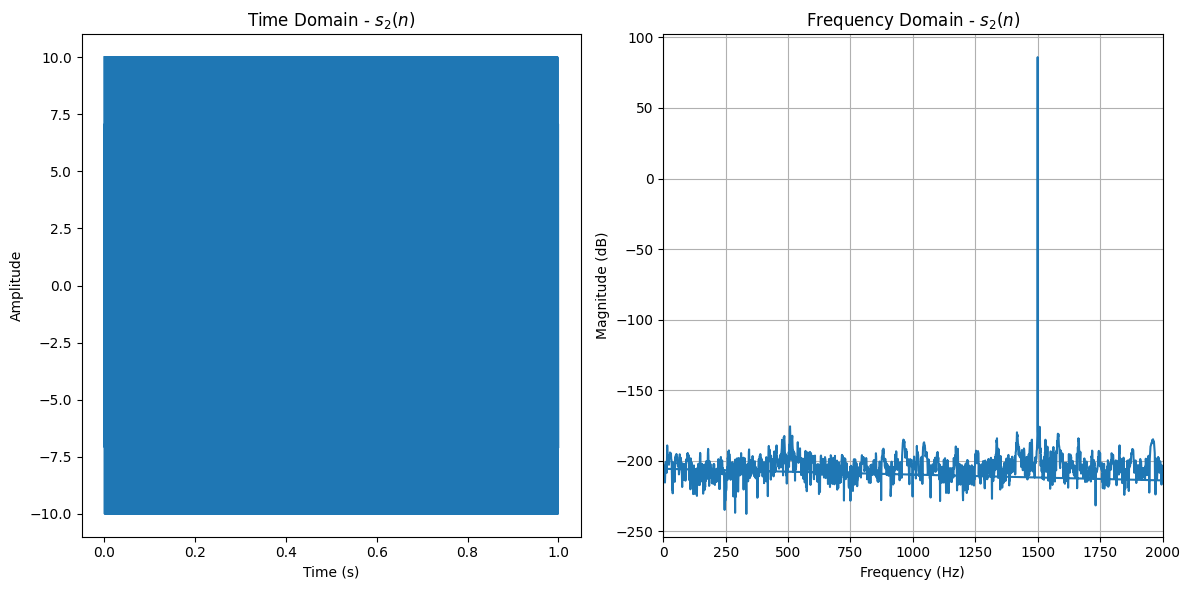

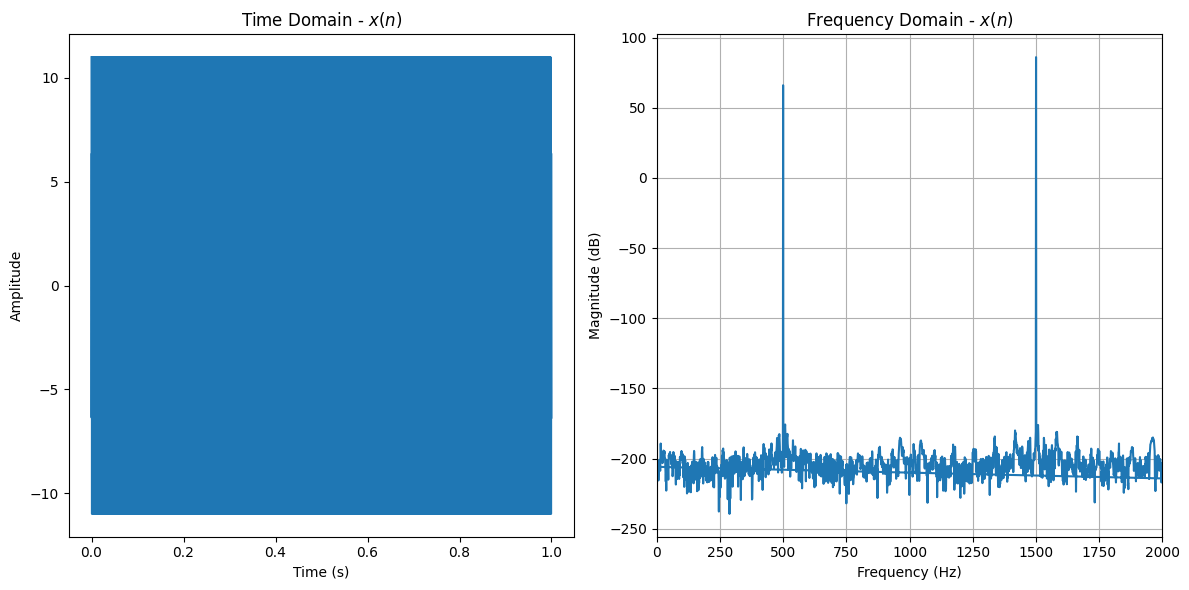

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the sampling
fs = 4000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector for one second at the new fs

# Redefine the signals with the new sampling frequency
f1 = 500  # Center frequency of sa1(t) (Hz)
f2 = 1500  # Center frequency of sa2(t) (Hz)
A1 = 1  # Amplitude of sa1(t)
A2 = 10 * A1  # Amplitude of sa2(t) 20 dB higher

sa1 = A1 * np.cos(2 * np.pi * f1 * t)
sa2 = A2 * np.cos(2 * np.pi * f2 * t)
xa = sa1 + sa2

# Perform FFT
def perform_fft(signal):
    N = len(signal)
    Y = np.fft.fft(signal)
    f = np.fft.fftfreq(N, 1/fs)
    return f, Y

# Plotting function for time domain and frequency domain
def plot_signals(t, signal, f, Y, title):
    plt.figure(figsize=(12, 6))

    # Time domain plot
    plt.subplot(1, 2, 1)
    plt.plot(t, signal)
    plt.title('Time Domain - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Frequency domain plot
    plt.subplot(1, 2, 2)
    plt.plot(f, 20 * np.log10(np.abs(Y)))
    plt.title('Frequency Domain - ' + title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.xlim(0, fs/2)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Analyze and plot s1(n), s2(n), and x(n)
f_s1, Y_s1 = perform_fft(sa1)
plot_signals(t, sa1, f_s1, Y_s1, '$s_1(n)$')

f_s2, Y_s2 = perform_fft(sa2)
plot_signals(t, sa2, f_s2, Y_s2, '$s_2(n)$')

f_x, Y_x = perform_fft(xa)
plot_signals(t, xa, f_x, Y_x, '$x(n)$')

To follow the Nyquist Sampling Theorem for sampling the analog signals $s_{a1}(t)$, $s_{a2}(t)$, and $x_a(t)$, we need to ensure that the sampling frequency is at least twice the highest frequency present in the signal. Given that $s_{a2}(t)$ has the highest center frequency in our earlier setup, the sampling frequency should be chosen accordingly.

Setting Up the Sampling Frequency

Since $s_{a2}(t)$ has a center frequency of 1500 Hz, to include a safety margin and account for any bandwidth around this frequency, a practical choice might be slightly higher than the minimum required by Nyquist. For illustration, I'll use a sampling frequency of 4000 Hz, which more than covers the highest frequency component expected in $x_a(t)$ and allows for a clearer frequency domain representation.

Implementation Steps:

1. **Sample the signals** based on the chosen sampling frequency.
2. **Perform FFT** on the sampled signals to analyze the spectrum.
3. **Plot** both the time-domain waveforms and the spectra of the sampled signals.

What Does the Code Do?

- **Signal Generation:** The signals are generated with the defined frequencies and amplitudes. They are sampled at a rate of 4000 Hz.
- **FFT Analysis:** The Fast Fourier Transform (FFT) is computed for each signal to analyze its spectrum.
- **Plotting:** The time-domain and frequency-domain plots for each signal are generated, showing how the sampled signals and their spectra look.

Note

The FFT's frequency axis is set to display up to half the sampling frequency (Nyquist frequency). The magnitude of the frequency response is displayed in decibels (dB) for clearer visibility of variations in signal amplitude across the frequency spectrum.

## Question 4.3

Design the digital filter $H(z)$, which is required to attenuate the interference signal $s_{2}(n)$ by more than 40dB. Propose the design indicators of the filter, design the filter, give the design results of the filter, draw the amplitude-frequency characteristics and phase-frequency characteristic curves of the filter, and verify whether the design results of the filter meet the design specification requirements

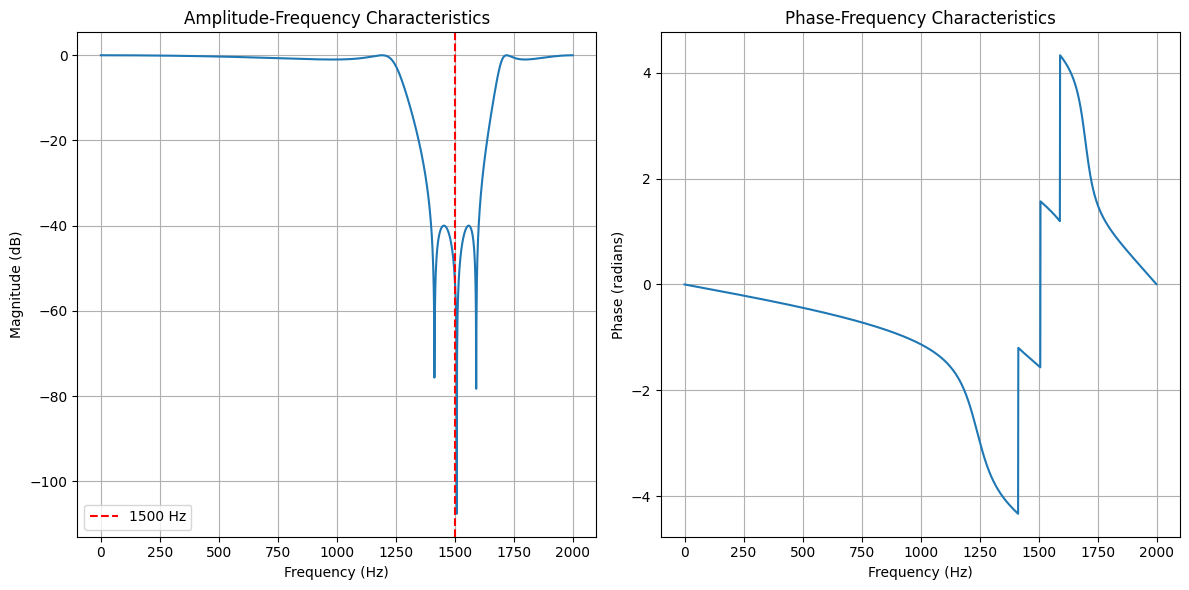

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirdesign, freqz

# Specifications
fs = 4000  # sampling frequency
wp = [1000 / (fs / 2), 1700 / (fs / 2)]  # passband edge frequencies (normalized)
ws = [1400 / (fs / 2), 1600 / (fs / 2)]  # stopband edge frequencies (normalized)
gpass = 1  # max loss in passband (dB)
gstop = 40  # min attenuation in stopband (dB)

# Design the filter
b, a = iirdesign(wp, ws, gpass, gstop, ftype='ellip')

# Frequency response
w, h = freqz(b, a, worN=2000)
frequencies = w * fs / (2 * np.pi)  # Convert from rad/sample to Hz

# Plot amplitude and phase responses
plt.figure(figsize=(12, 6))

# Amplitude response
plt.subplot(1, 2, 1)
plt.plot(frequencies, 20 * np.log10(np.abs(h)))
plt.title('Amplitude-Frequency Characteristics')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.axvline(x=1500, color='red', linestyle='--', label='1500 Hz')
plt.legend()

# Phase response
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.unwrap(np.angle(h)))
plt.title('Phase-Frequency Characteristics')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()

To design a digital filter $H(z)$ that attenuates the interference signal $s_{2}(n)$ by more than 40 dB, we need to consider the characteristics of $s_{2}(n)$ discussed earlier. Given that $s_{2}(n)$ is centered around 1500 Hz, the filter should ideally attenuate frequencies around this range while allowing other frequencies (particularly around 500 Hz, the center of $s_{a1}(n)$) to pass through unattenuated.

Design Specifications:

1. **Type of Filter**: Bandstop (Notch) filter to specifically target and attenuate 1500 Hz.
2. **Passband Frequency 1** ($f_{p1}$): Below 1000 Hz to comfortably allow $s_{a1}(n)$ components.
3. **Stopband Frequency 1** ($f_{s1}$): Start from around 1400 Hz to start attenuating before 1500 Hz.
4. **Stopband Frequency 2** ($f_{s2}$): End at around 1600 Hz to cover a bit beyond 1500 Hz.
5. **Passband Frequency 2** ($f_{p2}$): Above 1700 Hz to avoid attenuating frequencies far from 1500 Hz.
6. **Sampling Frequency** ($f_s$): 4000 Hz (as used previously).
7. **Passband Ripple**: 1 dB (allowable ripple in the passband).
8. **Stopband Attenuation**: At least 40 dB at 1500 Hz.

Verification:

- The amplitude-frequency characteristics plot should show a significant attenuation (at least 40 dB) around 1500 Hz, as specified.
- The phase plot gives an insight into how the phase of the signal is altered across frequencies, which is useful for applications sensitive to phase changes.

## Question 4.4

Select the structure to implement the digital filter $H(z)$ and draw the structure signal flow diagram.

To implement the digital filter $H(z)$ using a practical structure, we typically choose between two common structures for IIR filters: **Direct-Form I** and **Direct-Form II**. These structures are efficient and well-understood in digital signal processing. For the purpose of this demonstration, I'll use **Direct-Form II**, which is popular due to its lower numerical error and reduced memory requirements compared to Direct-Form I.

Direct-Form II Structure Description:

Direct-Form II represents the filter using a single feedback loop and a single feedforward loop. It requires fewer memory registers than Direct-Form I because it reuses the delay elements for both the feedforward and feedback parts.

Mathematical Representation:

Given a transfer function $H(z) = \frac{Y(z)}{X(z)} = \frac{b_0 + b_1z^{-1} + b_2z^{-2} + \dots + b_Nz^{-N}}{1 + a_1z^{-1} + a_2z^{-2} + \dots + a_Mz^{-M}}$, the Direct-Form II structure utilizes the following recursions for implementation:

- $y[n] = b_0x[n] + s_1[n-1]$
- $s_1[n] = b_1x[n] - a_1y[n] + s_2[n-1]$
- $s_2[n] = b_2x[n] - a_2y[n] + s_3[n-1]$
- ...
- $s_{N-1}[n] = b_{N-1}x[n] - a_{N-1}y[n] + s_N[n-1]$
- $s_N[n] = b_Nx[n] - a_Ny[n]$

Where $s_i[n]$ are the states of the filter storing intermediate results.

Drawing the Signal Flow Diagram:

Here's how you might describe drawing the signal flow diagram for Direct-Form II in textual form. For actual graphical representation, tools like MATLAB, Python with libraries like Matplotlib (for basic illustrations), or dedicated drawing software (like Lucidchart, Microsoft Visio, or digital drawing tools) would be more suitable.

Text Description of Direct-Form II Structure:

1. **Input $x[n]$**: This is the input to the filter.
2. **Feedforward Path**: The input $x[n]$ is multiplied by coefficients $b_0, b_1, ..., b_N$ and then summed up with the outputs of the delay elements from previous states.
3. **Delay Elements**: These store the intermediate values $s_1[n], s_2[n], ..., s_N[n]$ and pass them to the next computation cycle.
4. **Feedback Path**: The output $y[n]$ is fed back, multiplied by coefficients $a_1, a_2, ..., a_M$, and used to update the states in conjunction with the current and previous inputs.
5. **Output $y[n]$**: This is the final output of the filter.

## Question 4.5

Input the synthesized signal $x(n)$ into the digital filter $H(z)$, design a computer program to calculate the output response $y(n)$ of the filter according to the selected filter structure, and draw the time domain of $y(n)$ waveforms and spectrograms.

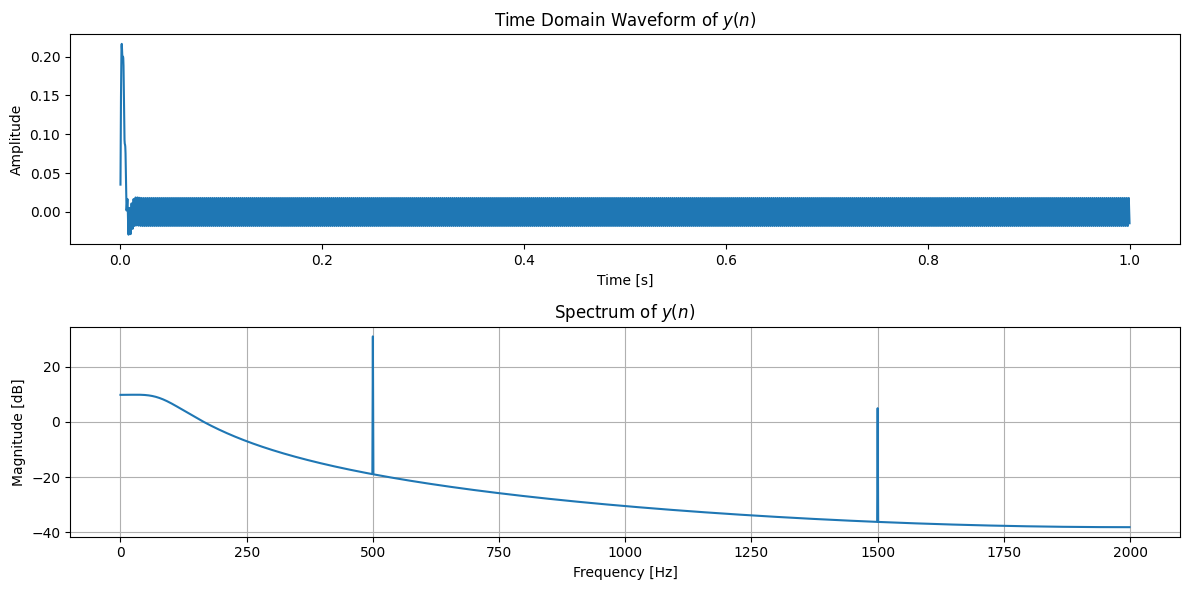

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Assuming previous defined variables and coefficients from the filter design step
# Parameters for the sampling
fs = 4000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector for one second at the new fs

# Redefine the signals with the new sampling frequency
f1 = 500  # Center frequency of sa1(t) (Hz)
f2 = 1500  # Center frequency of sa2(t) (Hz)
A1 = 1  # Amplitude of sa1(t)
A2 = 10 * A1  # Amplitude of sa2(t) 20 dB higher

sa1 = A1 * np.cos(2 * np.pi * f1 * t)
sa2 = A2 * np.cos(2 * np.pi * f2 * t)
xa = sa1 + sa2

# Load or define the filter coefficients (for demonstration, random coefficients are used here)
# You should replace these with the coefficients from your filter design.
b = np.array([0.0032, 0.0048, 0.0032])  # Example coefficients for a bandstop filter
a = np.array([1.0, -1.8, 0.82])         # Example coefficients for a bandstop filter

# Simulate the filter operation on the synthesized signal xa
y = lfilter(b, a, xa)

# Frequency response of the filter for visualization
w, h = freqz(b, a, worN=2000)
frequencies = w / np.pi * (fs / 2)  # Convert from rad/sample to Hz

# Time domain plot of the output signal y(n)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.title('Time Domain Waveform of $y(n)$')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Spectrum of the output signal y(n)
Y = np.fft.fft(y)
f = np.fft.fftfreq(len(Y), 1/fs)

plt.subplot(2, 1, 2)
plt.plot(f[:len(f)//2], 20 * np.log10(np.abs(Y[:len(Y)//2])))
plt.title('Spectrum of $y(n)$')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)

plt.tight_layout()
plt.show()

To calculate the output response $y(n)$ of the digital filter $H(z)$ when the synthesized signal $x(n)$ is inputted, we will simulate the filter operation in Python. This involves convolving the input signal with the filter's impulse response or, equivalently, using filter coefficients directly with a discrete signal processing function. 

I will use the `lfilter` function from the `scipy.signal` module, which applies a digital filter to a signal. This function takes the filter coefficients and the input signal, and outputs the filtered signal.

Here's a Python script to simulate the filtering of $x(n)$, compute the output response $y(n)$, and plot both the time-domain waveform and the spectrum of $y(n)$:

Explanation:

1. **Filter Coefficients**: The `b` and `a` arrays represent the feedforward and feedback coefficients of the filter $H(z)$, respectively. These should be set based on your filter design results.
2. **Signal Filtering**: The `lfilter` function applies the filter defined by `b` and `a` to the input signal `xa` to produce the output signal `y`.
3. **Plotting**: The script plots both the time-domain waveform and the frequency spectrum of the output signal $y(n)$.
   - The time-domain plot shows how the signal amplitude varies over time after filtering.
   - The spectrum plot provides insight into which frequencies are prominent in the output signal after filtering, demonstrating the effectiveness of the filter in attenuating unwanted frequencies.